In [ ]:
import numpy as np
from PIL import Image
from load_image import ft_load
import matplotlib.pyplot as plt


img_arr: np.array = ft_load("../img/animal.jpeg")
if img_arr is None:
    exit(1)
zoomed: Image.Image = Image.fromarray(img_arr).crop((400, 200, 800, 600))
grayscale: Image.Image = zoomed.convert(mode="L")
nb_channels = len(grayscale.getbands())
shape = f"({grayscale.height}, {grayscale.width}, {nb_channels})"
print(f"New shape after slicing: {shape} or {grayscale.size}")
print(np.asarray(grayscale))
plt.imshow(np.asarray(grayscale), cmap="gray")

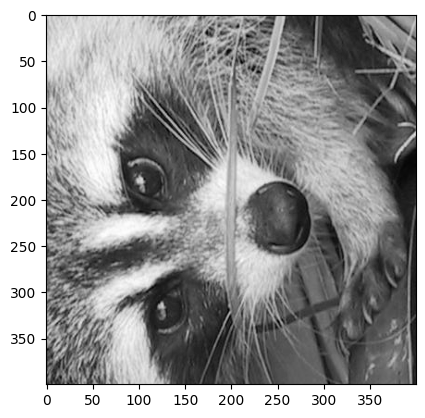

In [102]:
transposed: np.ndarray = np.array(grayscale).copy()
grayscale_arr = np.asarray(grayscale)
for l in range(grayscale.height):
    for p in range(grayscale.width):
        transposed[l, p] = grayscale_arr[p, l]
print(f"New shape after Transpose: {transposed.shape}")
print(transposed)
plt.imshow(transposed, cmap="gray")
plt.show()

In [100]:
%%timeit
grayscale_arr = np.asarray(grayscale).transpose((1, 0))
# plt.imshow(grayscale_arr, cmap="gray")
# plt.show()

12.3 μs ± 253 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [101]:
%%timeit
grayscale_arr = grayscale.transpose(Image.ROTATE_90).transpose(Image.FLIP_TOP_BOTTOM)
# plt.imshow(grayscale_arr, cmap="gray")
# plt.show()

120 μs ± 15.9 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
